In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['line', 'direction', 'station_diva_id', 'date', 'should_arrive_at', 
              'actually_arrived_at', 'next_station_diva_nach']
stationDS = pd.DataFrame(columns=col_names)
targetStationId = 2572

In [3]:
csv_names = ['fahrzeiten_soll_ist_20190623_20190629.csv',
             'fahrzeiten_soll_ist_20190616_20190622.csv', 
             'fahrzeiten_soll_ist_20190609_20190615.csv',
             'fahrzeiten_soll_ist_20190602_20190608.csv',
             'fahrzeiten_soll_ist_20190505_20190511.csv',
            'fahrzeiten_soll_ist_20190630_20190706.csv']

for name in csv_names:
    dataSet = pd.read_csv('data/' + name)
    ds = dataSet.loc[:, ['linie', 'richtung', 'halt_diva_von', 'datum_von', 'soll_an_von', 'ist_an_von', 'halt_diva_nach']]
    ds = ds.loc[ds['halt_diva_von'] == targetStationId]
    ds.columns = col_names
    stationDS = stationDS.append(ds)   

In [4]:
print('stationDS data shape: ', stationDS.shape)
stationDS = stationDS.sort_values(by=['date', 'should_arrive_at'], ascending=True)
stationDS.head(10)

stationDS data shape:  (63999, 7)


,line,direction,station_diva_id,date,should_arrive_at,actually_arrived_at,next_station_diva_nach
58978,75,2,2572,01.07.19,138,186,3447
53987,94,2,2572,01.07.19,192,189,3034
53978,10,2,2572,01.07.19,252,306,3034
53986,61,1,2572,01.07.19,270,388,3154
58980,75,1,2572,01.07.19,504,480,694
58969,12,1,2572,01.07.19,540,460,6033
54004,11,2,2572,01.07.19,636,628,3154
53983,62,2,2572,01.07.19,672,659,3034
67069,14,1,2572,01.07.19,732,744,2151
67073,14,2,2572,01.07.19,762,821,3447


In [5]:
# fileToSave = 'data/generated/station_' + str(targetStationId) + '.csv'
# targetStationData.to_csv(fileToSave, encoding='utf-8', index=False)

Data types of the columns

In [6]:
stationDS.dtypes

line                      object
direction                 object
station_diva_id           object
date                      object
should_arrive_at          object
actually_arrived_at       object
next_station_diva_nach    object
dtype: object

In [7]:
ds = stationDS

# calculate delay time by subtracting y-x
# delays in sec --> y (target)
ds['delays'] = ds['actually_arrived_at'] - ds['should_arrive_at']

# filtering dataset for only delays 0 <= delay < 600
ds = ds.loc[(ds['delays'] >= 0) & (ds['delays'] < 600)]

[8, 10, 11, 12, 14, 15, 17, 61, 62, 75, 94]


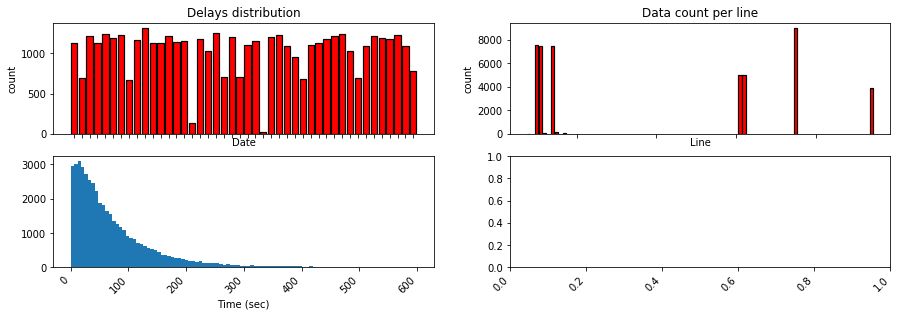

In [8]:
#Plotting graphs

# fig, ax = plt.subplots()
# ax.set_title('Data count per day')
# ax.set_ylabel('count')
# ax.plot(count_per_day.index, count_per_day.line)
# ax.margins(x=0, y=0)

# plt.hist(ds.date)
# plt.ylabel('Data count per day');


# Set up the plotting layout
fig, ((ax1, ax2), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 45)

ax1.set_xlabel('Date'); ax1.set_ylabel('count'); ax1.set_title('Data count per day')
# ax1.hist(ds.date)
count_per_day = ds.groupby('date').count()
ax1.bar(count_per_day.index, count_per_day.line, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);


ax2.set_xlabel('Line'); ax2.set_ylabel('count'); ax2.set_title('Data count per line')
# ax2.hist(ds.line);
count_per_line = ds.groupby('line').count()
ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);
lines = ds.line.unique()
print(sorted(lines))
# plt.xticks(count_per_line.index, count_per_line['index'].apply(str), rotation='vertical')

# fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15,5))
# fig.autofmt_xdate(rotation = 45)

ax21.set_xlabel('Time (sec)'); ax1.set_ylabel('count'); ax1.set_title('Delays distribution')
ax21.hist(ds.delays, bins=100);
# ax1.scatter(delays, delays);
# count_per_line = ds.groupby('line').count()
# ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);

In [9]:
features = ds.copy();
# Add column to represent day of week
# features['date'] = pd.to_datetime(features['date'])
features['day_of_week'] = pd.to_datetime(features['date']).dt.weekday

# split date into day, month, year
features['day'] = pd.to_datetime(features['date']).dt.day
features['month'] = pd.to_datetime(features['date']).dt.month
# features['year'] = pd.to_datetime(features['date']).dt.year

# drop date column because we splitted it
features = features.drop('date', axis = 1)

# drop 'actually_arrived_at' column because we have delays now!
features = features.drop('actually_arrived_at', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

print(features.shape)
features.head()
# ds.day_of_week.unique()

(45748, 9)


,line,direction,station_diva_id,should_arrive_at,next_station_diva_nach,delays,day_of_week,day,month
58978,75,2,2572,138,3447,48,0,7,1
53978,10,2,2572,252,3034,54,0,7,1
53986,61,1,2572,270,3154,118,0,7,1
67069,14,1,2572,732,2151,12,0,7,1
67073,14,2,2572,762,3447,59,0,7,1


In [10]:
# Convert to numpy array
labels = np.array(features.delays)
features = np.array(features.drop('delays', axis = 1))

In [11]:
labels = labels + 1

In [12]:
print(features[:5])
print(labels[:5])

[[75 2 2572 138 3447 0 7 1]
 [10 2 2572 252 3034 0 7 1]
 [61 1 2572 270 3154 0 7 1]
 [14 1 2572 732 2151 0 7 1]
 [14 2 2572 762 3447 0 7 1]]
[49 55 119 13 60]


In [13]:
# delete variables
del ds
del stationDS

In [14]:
from sklearn.model_selection import train_test_split

# train_features, test_features, train_labels, test_labels = train_test_split(
#     features, labels, test_size = 0.20, random_state = 42
# );

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.20, shuffle=False
);

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (36598, 8)
Training Labels Shape: (36598,)
Testing Features Shape: (9150, 8)
Testing Labels Shape: (9150,)


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [17]:
print(test_labels[:20])
print(predictions[:20])

[11 224 24 47 156 42 120 136 62 64 22 7 30 4 172 357 345 118 33 11]
[ 49.398 127.51   52.527  23.815 224.606 171.094  74.209  55.023  45.08
  66.341 120.452  23.079 251.403  78.198  72.428  74.209 116.567 119.419
  97.178  22.807]


In [18]:


# Calculate the absolute errors
errors = abs(predictions - test_labels)


print('Average error:', round(np.mean(errors), 2))

l2_norm =  np.square(errors)
print('l2 Error:', round(np.sqrt(np.mean(l2_norm)), 2))
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average error: 60.05
l2 Error: 90.16
Accuracy: 97.15 %.
